# Plotting a spectrogram

In addition to plotting data in the time or frequency domains, it is possible to show both time and frequency information by plotting a spectrogram of the data.  One method to do this is the "Q-transform", which uses a wavelet basis to transform data into a time-frequency representation.

In this notebook, a simulated signal will be added to some white noise, and then displayed as a spectrogram.


In [1]:
# -- For google co-lab
# ! pip install -q pycbc gwpy

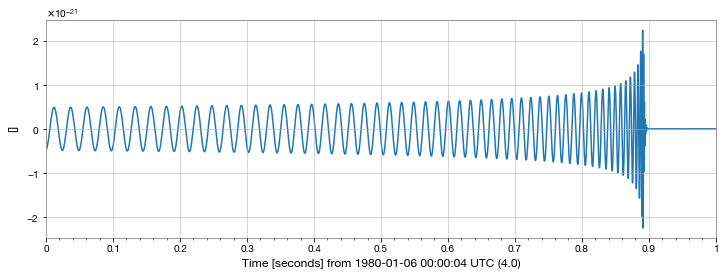

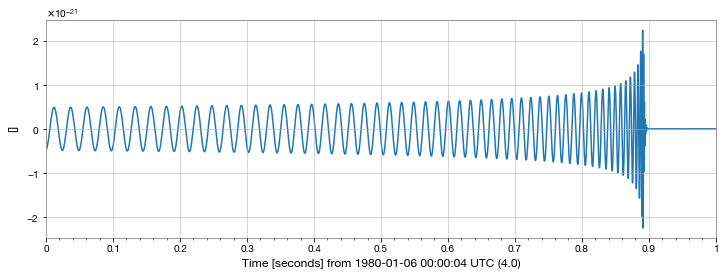

In [2]:
import numpy as np
from pycbc.waveform import get_td_waveform
from gwpy.timeseries import TimeSeries

fs = 4096
apx = 'SEOBNRv2'
hp, hc = get_td_waveform(approximant=apx,
                                 mass1=10,
                                 mass2=10,
                                 delta_t=1.0/fs,
                                 distance = 100,
                                 f_lower=40)

# -- Load the signal into a gwpy TimeSeries object
cbc = TimeSeries(hp, dt=1/fs, t0 = 4)

# -- Make some white noise
noise_arr = np.random.random(fs*8)*1e-24
noise = TimeSeries(noise_arr, dt=1.0/fs)

# -- "Inject" the signal into the noise
data = noise.inject(cbc)
data.plot(xlim = (4,5))

(20, 1000)

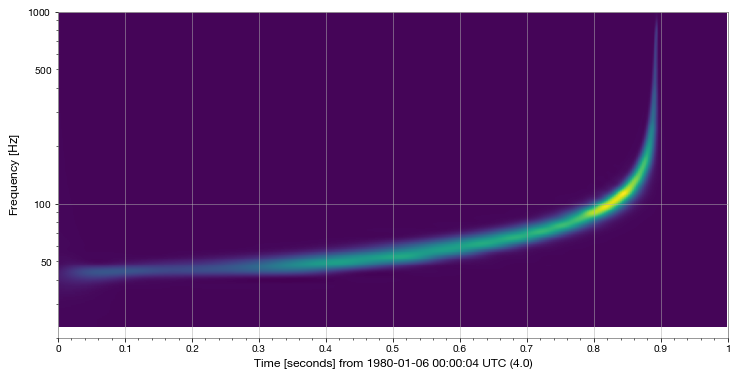

In [3]:
plot = data.q_transform(outseg=(4,5), qrange=(10,30)).plot()

ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_ylim(20, 1000)

## Check Questions

1. What is the frequency of the signal at early times, around 0.8 seconds before merger?
1. What is the frequency of the signal around the merger time?
1. Why does the frequency increase as you get get closer to the end?

## Practice with python

1. Try making the same plots, for a signal with mass 1 = mass 2 = 30 solar masses
1. What things are different in the lower mass and higher mass signal?